In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only = False)

In [2]:
data = pd.read_csv(r'D:\ICT kerala\week15_nbc\activity\tcp-connection (1).csv')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
494016,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
494017,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
494018,0,b'tcp',b'smtp',b'SF',2152,327,0,0,0,0,...,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',283,1270,0,0,0,0,...,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0,b'normal.'
494020,0,b'tcp',b'private',b'REJ',0,0,0,0,0,0,...,3,0.01,0.07,0.00,0.00,0.0,0.0,1.0,1.0,b'neptune.'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [6]:
data.shape

(494021, 42)

In [7]:
cols = data.columns
cols

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [8]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

* There are no missing values

<AxesSubplot:>

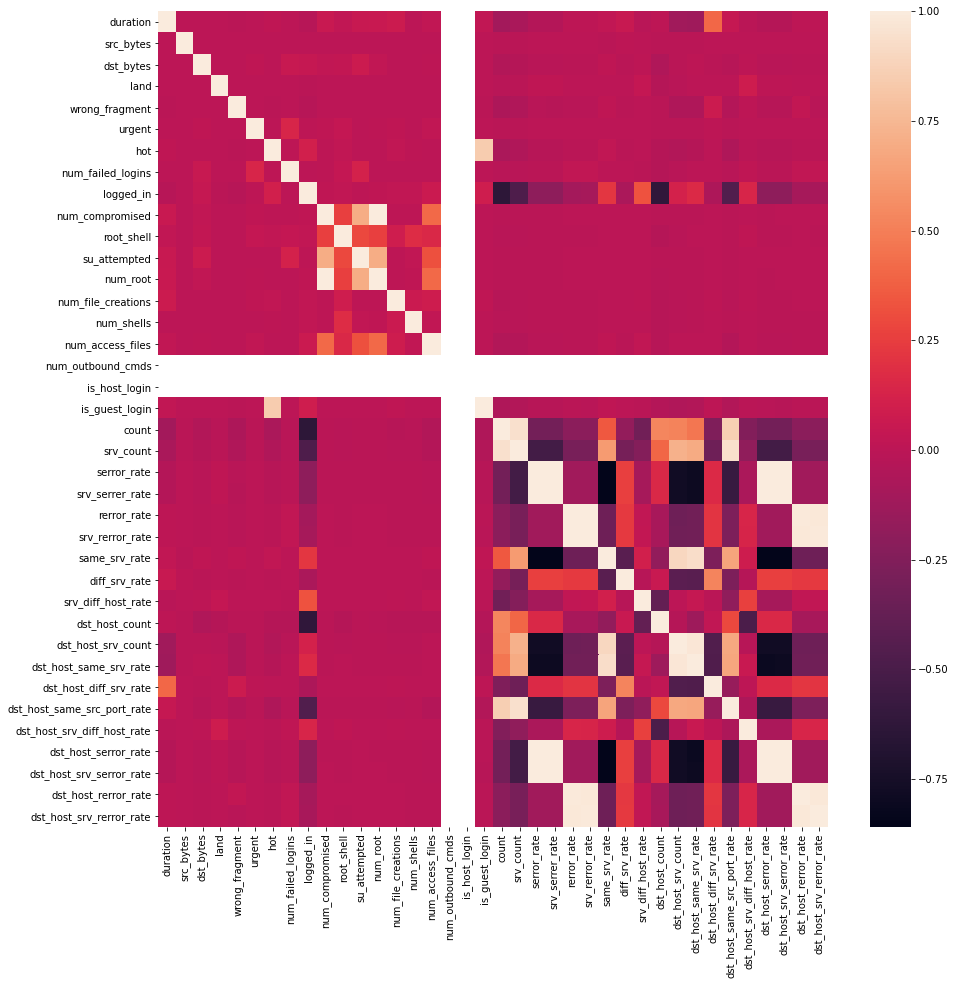

In [9]:
corr_matrix = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix)

In [10]:
data['num_outbound_cmds'].value_counts()

0    494021
Name: num_outbound_cmds, dtype: int64

In [11]:
data['is_host_login'].value_counts()

0    494021
Name: is_host_login, dtype: int64

We can drop the columns 'num_outbound_cmds' and 'is_host_login' since there is only one unique value in the enitre column

In [12]:
data.drop(['num_outbound_cmds', 'is_host_login'], axis = 1, inplace = True)

In [13]:
corr_df = data.corr().abs()

In [14]:
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape), k = 1).astype(np.bool))

In [15]:
upper_tri

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,NaN,0.004258,0.005440,0.000452,0.003235,0.003786,0.013213,0.005239,0.017265,0.058095,...,0.010074,0.117515,0.118458,0.406233,0.042642,0.006983,0.030400,0.030612,0.006739,0.010465
src_bytes,NaN,NaN,0.000002,0.000020,0.000139,0.000005,0.004483,0.000027,0.001701,0.000119,...,0.001743,0.003212,0.002052,0.000578,0.000724,0.001186,0.000718,0.001122,0.000393,0.001328
dst_bytes,NaN,NaN,NaN,0.000175,0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,0.048869,0.005850,0.007058,0.005314,0.020143,0.008707,0.011334,0.011235,0.005000,0.005471
land,NaN,NaN,NaN,NaN,0.000318,0.000017,0.000295,0.000065,0.002784,0.000038,...,0.023671,0.011587,0.001984,0.000333,0.003799,0.083320,0.012658,0.007795,0.001511,0.001665
wrong_fragment,NaN,NaN,NaN,NaN,NaN,0.000123,0.002106,0.000467,0.019908,0.000271,...,0.005191,0.058624,0.054903,0.071857,0.031803,0.012092,0.019091,0.022104,0.029774,0.011904
urgent,NaN,NaN,NaN,NaN,NaN,NaN,0.000356,0.141996,0.006164,0.014285,...,0.007139,0.004540,0.003279,0.010536,0.002002,0.000408,0.001194,0.001191,0.000648,0.000641
hot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008740,0.105305,0.007348,...,0.026366,0.038730,0.029117,0.001319,0.052923,0.004467,0.019491,0.020201,0.006541,0.007749
num_failed_logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001145,0.006907,...,0.025444,0.015413,0.000507,0.001017,0.009565,0.016001,0.001945,0.002453,0.024753,0.023584
logged_in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013612,...,0.621029,0.119315,0.161070,0.061151,0.461558,0.140493,0.190955,0.191704,0.090868,0.087885
num_compromised,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.008361,0.004797,0.002584,0.000359,0.006715,0.000621,0.001978,0.001631,0.000843,0.000873


In [16]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['num_root', 'srv_serrer_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [17]:
for x in to_drop:
    data.drop([x], axis = 1, inplace = True)
data.shape

(494021, 32)

In [18]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

### Splitting the datset into feature set and response variable

In [19]:
# Feature set
x = data.drop(['intrusion'], axis = 1)

# Respons variable
y = data['intrusion']

## Encoding

In [20]:
col = ['protocol_type', 'service', 'flag']
for var in col:
    print(data[var].value_counts())

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64
b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'red_i'           1
b'pm_dump'         1
b'tftp_u'          1
Name: service, Length: 66, dtype: int64
b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64


In [21]:
y.unique()

array(["b'normal.'", "b'smurf.'", "b'neptune.'", "b'warezclient.'",
       "b'satan.'", "b'back.'", "b'ipsweep.'", "b'portsweep.'",
       "b'teardrop.'", "b'guess_passwd.'", "b'nmap.'", "b'imap.'",
       "b'pod.'", "b'phf.'", "b'loadmodule.'", "b'buffer_overflow.'",
       "b'warezmaster.'", "b'land.'", "b'rootkit.'", "b'perl.'",
       "b'multihop.'", "b'ftp_write.'", "b'spy.'"], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y = label_enc.fit_transform(y)


In [23]:
for var in col:
    x[var] = label_enc.fit_transform(x[var])

In [24]:
x.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [25]:
x.shape

(494021, 31)

### Splitting the data into train and test sets

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [27]:
x_train.shape

(395216, 31)

In [28]:
y_train.shape

(395216,)

In [29]:
x_test.shape

(98805, 31)

In [30]:
y_test.shape

(98805,)

## Modeling

### Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, gnb_pred))

Accuracy score =  0.9476241080916957


In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)
mnb_pred = mnb_model.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, mnb_pred))

Accuracy score =  0.8370426597844238


In [33]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
bnb_pred = bnb_model.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, bnb_pred))

Accuracy score =  0.9930469105814483


In [34]:
from sklearn.naive_bayes import ComplementNB
cnb_model = ComplementNB()
cnb_model.fit(x_train, y_train)
cnb_pred = cnb_model.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, cnb_pred))

Accuracy score =  0.69798087141339


## Fine Tuning the Model

* From the above models Gaussian Naive Bayes classification model is the best

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 999)

In [36]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing' : np.logspace(0, -9, num = 100)}
gs_NB = GridSearchCV(estimator = gnb_model, param_grid = params_NB, cv = cv_method
                    , verbose = 1, scoring = 'accuracy')
data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1....
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [37]:
predictions = gs_NB.predict(data_transformed)
print('Accuracy score = ', accuracy_score(y_test, predictions))

Accuracy score =  0.9599210566266889
